In [1]:
%load_ext autoreload
%autoreload 2

# Generación de datos

In [63]:
from src.data_gen import generate_instances

instances = generate_instances(filename="TSP50.pkl", instance_count=1000, cities=50, seed=42)

In [11]:
from src.data_gen import generate_instances

instances = generate_instances(filename="benchmarks/b100.pkl", instance_count=100, cities=100, seed=42100)

In [40]:
from src.data_gen import generate_train_data

generate_train_data(instance_file="TSP50.pkl", data_filename="TSP50_10000.pkl", size=10000)

# Entrenamiento

In [41]:
from src.training import load_data

dataset = load_data(file_path="TSP50_20000.pkl")

In [43]:
from src.models.transformer_v5 import TSPTransformer

# Parámetros del modelo
input_dim = 2
embed_dim = 64
num_heads = 4
num_encoder_layers = 2
num_glimpses = 2
dropout = 0.1

# Crear modelo
model = TSPTransformer(
    input_dim=input_dim,
    embed_dim=embed_dim,
    num_heads=num_heads,
    num_encoder_layers=num_encoder_layers,
    num_glimpses=num_glimpses,
    dropout_rate=dropout
)

In [44]:
from src.training import train

epochs = 50
train_size = 16000
test_size = 4000
batch_size = 64
learning_rate = 1e-4
seed = 42

model = train(model, dataset, epochs, train_size, test_size, batch_size, learning_rate, seed)

Usando dispositivo: cpu
Epoch 1/50 - Train Loss: 3.6055, Train Accuracy: 46.73% - Val Loss: 3.3892, Val Accuracy: 76.20%
Epoch 2/50 - Train Loss: 3.3647, Train Accuracy: 71.99% - Val Loss: 3.2852, Val Accuracy: 80.65%
Epoch 3/50 - Train Loss: 3.3011, Train Accuracy: 74.94% - Val Loss: 3.2441, Val Accuracy: 82.15%
Epoch 4/50 - Train Loss: 3.2685, Train Accuracy: 76.20% - Val Loss: 3.2232, Val Accuracy: 82.78%
Epoch 5/50 - Train Loss: 3.2498, Train Accuracy: 76.67% - Val Loss: 3.2025, Val Accuracy: 83.35%
Epoch 6/50 - Train Loss: 3.2377, Train Accuracy: 77.49% - Val Loss: 3.2006, Val Accuracy: 82.08%
Epoch 7/50 - Train Loss: 3.2292, Train Accuracy: 77.53% - Val Loss: 3.1871, Val Accuracy: 83.60%
Epoch 8/50 - Train Loss: 3.2171, Train Accuracy: 78.22% - Val Loss: 3.1786, Val Accuracy: 83.70%
Epoch 9/50 - Train Loss: 3.2127, Train Accuracy: 78.04% - Val Loss: 3.1763, Val Accuracy: 83.50%
Epoch 10/50 - Train Loss: 3.2050, Train Accuracy: 78.79% - Val Loss: 3.1693, Val Accuracy: 83.55%
Epoch

In [29]:
from src.training import save_model
save_model(model, model_name="model_v5_3")

In [30]:
from src.training import load_model
from src.models.transformer_v5 import TSPTransformer

model = load_model(TSPTransformer, model_name="model_v5_3")

# Validación

Predicted cost: 6.130523948677725


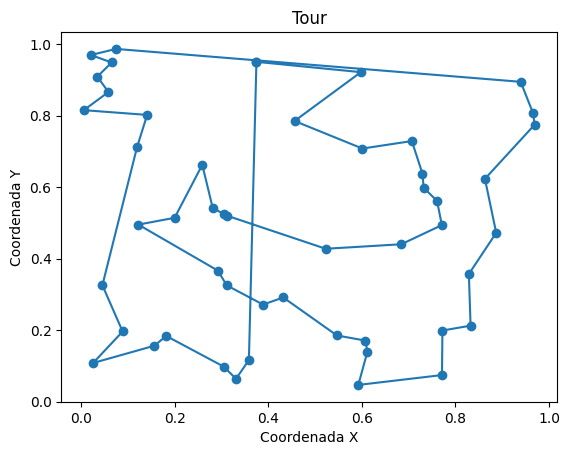

In [36]:
from src.data_gen import read_instances
from src.solvers.model import ModelSolver

instances = read_instances("TSP50.pkl")
instance = instances[0]

model_solver = ModelSolver(model)
model_sol = model_solver.solve(instance)
print("Predicted cost:", model_sol.cost)
model_sol.plot()

Optimal cost: 5.393124245897437


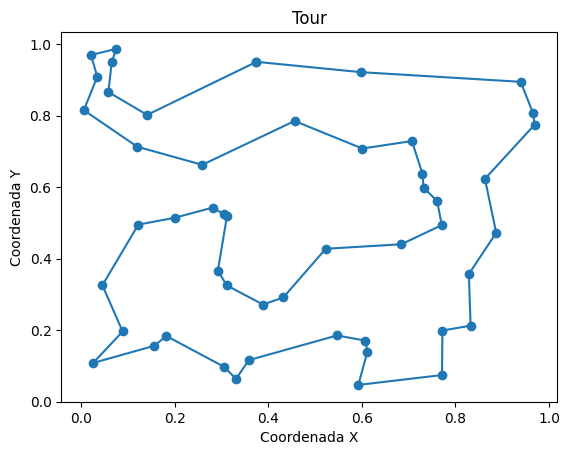

In [20]:
from src.data_gen import read_instances
from src.solvers.ortools import solve

instances = read_instances("TSP50.pkl")
instance = instances[0]

ortools_sol = solve(instance)
print("Optimal cost:", ortools_sol.cost)
ortools_sol.plot()

In [34]:
from src.solvers.ortools import solve
from src.solvers.model import ModelSolver
from src.data_gen import read_instances

instance_file = "benchmarks/b100.pkl"
instances = read_instances(instance_file)
model_costs = []
opt_costs = []

model_solver = ModelSolver(model)

for instance in instances:
    model_sol = model_solver.solve(instance)
    ortools_sol = solve(instance)

    model_costs.append(model_sol.cost)
    opt_costs.append(ortools_sol.cost)

print("Avg gap (%):", sum((mc - oc) / oc * 100 for mc, oc in zip(model_costs, opt_costs)) / len(opt_costs))

Avg gap (%): 6.181145409150589
